# Exercise 11: The beauty of kNN

In this exercise, you'll gain practice working with kNN. We'll use the [diamonds](https://ggplot2.tidyverse.org/reference/diamonds.html) dataset, which comes as part of `ggplot2`. This dataset provides information on the quality and price of 50,000 diamonds


1. data plotting and train/test sets 2/2
2. knn 3/3
3. for loop 3/3
4. standardizing predictors 2/2

## 1. Data, Plotting, and Train/Test Sets (2 pts)
-----
* Load the the `class` and `tidyverse` packages.
* Assign the `diamonds` data set to a simpler name. Then, create a new variable `price_bin` that splits the `price` variable into a binary variable, where 1 indicates that the diamond costs greater than the mean price, and 0 indicates that the diamond costs less than the mean price. Set `price_bin` to be a factor. (*Hint: use the if_else() function*)
* Select just the `carat`, `depth`, `table`, `x`, `y`, and your new `price_bin` variables
* Print the first few lines of the data set
* Print the dimensions of the data set


In [ ]:
# INSERT CODE HERE
require(class)
require(tidyverse)

dia <- diamonds

mean_price <- mean(dia$price)
dia$price_bin <- if_else(dia$price > mean_price, 1, 0) |> as.factor()

dia |>
  select(carat, depth, table, x, y, price_bin) ->
  dia

head(dia)
dim(dia)

carat,depth,table,x,y,price_bin
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.23,61.5,55,3.95,3.98,0
0.21,59.8,61,3.89,3.84,0
0.23,56.9,65,4.05,4.07,0
0.29,62.4,58,4.20,4.23,0
0.31,63.3,58,4.34,4.35,0
0.24,62.8,57,3.94,3.96,0


[1] 53940     6

### Plot
Create a scatterplot of the link between `carat` and `depth`, and use the `color` aesthetics mapping to differentiate between diamonds that cost above versus below the mean price.

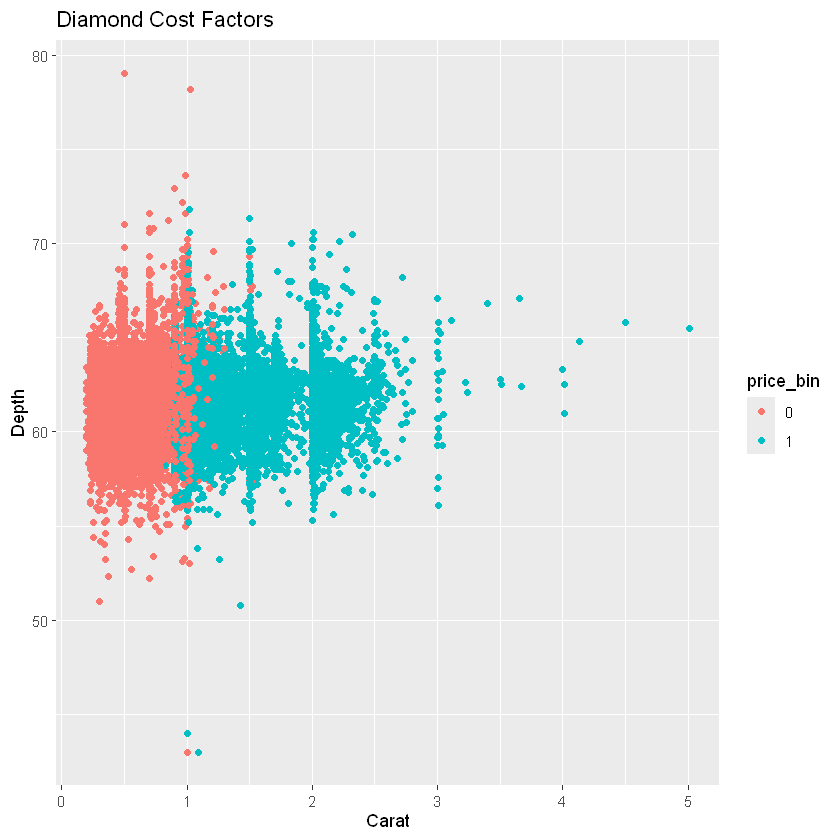

In [ ]:
# INSERT CODE HERE
ggplot(dia, aes(x = carat, y = depth, color = price_bin)) +
  geom_point() +                                # Scatter plot
  labs(title = "Diamond Cost Factors",
       x = "Carat",
       y = "Depth")

Based on the above scatterplot, how do you think kNN will perform using only these two variables to predict diabetes diagnosis? Which variable, carat or depth, gives us the most information about which price class the diamond will belong to?
> *Write response here*
>
> We can observe some clustering within each of the two classes, although the boundary between them is a little blurry. I think kNN will perform fairly well using only these two variables. It might have some difficulty differentiating samples at the boundary.
>
> Based on the plot, the carat number gives us more information about the price class.


### Test vs Train

Before we run KNN on these data, we need to set aside a portion of the observations as our test set. Below, randomly divide the data such that 30% are allotted to the `test` set and the rest are allotted to the `train` set. Print the first few lines of each set, and print the dimensions of each set to double check your division of the data.

In [ ]:
set.seed(2023)


# INSERT CODE HERE
# pull random sample of 30% of samples
TEST_RATIO = 0.3 # 30%
test_idx <- sample(1:nrow(dia), as.integer(round(nrow(dia) * TEST_RATIO)))

train <- dia[-test_idx,]
test <- dia[test_idx,]

print("Train set:")
head(train)
dim(train)

print("Test set:")
head(test)
dim(test)

[1] "Train set:"


carat,depth,table,x,y,price_bin
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
0.23,61.5,55,3.95,3.98,0
0.23,56.9,65,4.05,4.07,0
0.29,62.4,58,4.20,4.23,0
0.31,63.3,58,4.34,4.35,0
0.24,62.8,57,3.94,3.96,0
0.24,62.3,57,3.95,3.98,0


[1] 37758     6

[1] "Test set:"


carat,depth,table,x,y,price_bin
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1.22,62.3,56.0,6.81,6.84,1
1.57,62.3,56.0,7.48,7.41,1
1.11,62.4,57.7,6.57,6.64,1
0.42,60.6,57.0,4.82,4.85,0
0.32,62.6,55.0,4.39,4.36,0
0.90,62.7,58.0,6.06,6.15,1


[1] 16182     6

## 2: KNN (3 points)
----
Now, use the `knn()` function from the `class` library to predict `price_bin` from the `carat` and `depth`. Set `k = 3`.

*Hint: Review the format required for the arguments of knn()*

In [ ]:
set.seed(2023)
# INSERT CODE HERE
train.X1 <- cbind(train$carat, train$depth) # Bind features by columns
train.y <- train$price_bin
test.X1 <- cbind(test$carat, test$depth)
test.y <- test$price_bin

#run knn
test.y_pred1 <- knn(train.X1, test.X1, train.y, k = 3)

#print first 10 test predictions
test.y_pred1[1:10]

[1] 1 1 1 0 0 1 1 0 0 0
Levels: 0 1

Now, output a confusion matrix and calculate the test error to evaluate model performance.

In [ ]:
# INSERT CODE HERE
confusion_df = data.frame(test.y_pred1, test.y)
colnames(confusion_df) = c('Predicted', 'Actual')

table(confusion_df)
print(paste("Error rate:",mean(test.y_pred1 != test.y)))
print(paste("Accuracy:",mean(test.y_pred1 == test.y)))

         Actual
Predicted    0    1
        0 9707  316
        1  539 5620

[1] "Error rate: 0.0528364849833148"
[1] "Accuracy: 0.947163515016685"


How did your model perform?
> Write your response here
>
> The sample is relatively balanced, and an accuracy of 94.72% shows that the model performs quite well.


Let's try to improve our model by adding all of the other variables in our data set as predictors. Rerun your `knn()` below, keeping `k = 3`. Again, output a confusion matrix and error rate for your updated model fit.

In [ ]:
set.seed(2023)
# INSERT CODE HERE
train.X2 <- subset(train, select=-c(price_bin)) # exclue price_bin and use all other features
train.y <- train$price_bin
test.X2 <- subset(test, select=-c(price_bin))
test.y <- test$price_bin

#run knn
test.y_pred2 <- knn(train.X2, test.X2, train.y, k = 3)

#print first 10 test predictions
test.y_pred2[1:10]

#create confusion matrix
confusion_df = data.frame(test.y_pred2, test.y)
colnames(confusion_df) = c('Predicted', 'Actual')

table(confusion_df)
print(paste("Error rate:",mean(test.y_pred2 != test.y)))
print(paste("Accuracy:",mean(test.y_pred2 == test.y)))

[1] 1 1 1 0 0 1 1 0 0 0
Levels: 0 1

         Actual
Predicted    0    1
        0 9728  391
        1  518 5545

[1] "Error rate: 0.0561735261401557"
[1] "Accuracy: 0.943826473859844"


Did your model predictions improve?
> Write your response here
>
> The model predictions did not improve.


# 3: for loop (3 points)
----

So adding additional predictors didn't shift our error much. Let's see if adjusting `k` has a larger impact on model accuracy.

Using your initial model above with just `carat` and `depth`, run a `for loop` that runs the same model 30 times, for `k = 1:30`.

Output a data frame that has `k` and the overall `error` as columns.

The structure of the output data frame and `for loop` are provided for you below. Note that your loop will take a minute or two to run because there are so many observations in the dataset. It may be helpful while you are writing and testing your loop to run it on a subset of the data with only a handful of rows.

In [ ]:
# this is provided
# setting up empty table to store for loop output
output  <- data.frame(k = seq(1:30),
                     error = rep(NA, 30))
head(output)

,k,error
,<int>,<lgl>
1,1,NA
2,2,NA
3,3,NA
4,4,NA
5,5,NA
6,6,NA


In [ ]:
for (k in seq(1:30)) {
    knn_fits  <- knn(train.X1, test.X1, train.y, k = k) # your knn function here

    #overall error
    conf_df  <- data.frame(knn_fits, test.y) # data frame of test predictions versus actual test
    colnames(conf_df) = c('Predicted', 'Actual')
	output$error[k]  <- mean(conf_df$Predicted != conf_df$Actual) #calculate error from conf_df and add to your output dataframe
}
head(output)

,k,error
,<int>,<dbl>
1,1,0.05388703
2,2,0.05333086
3,3,0.05320727
4,4,0.05326906
5,5,0.05209492
6,6,0.05258930


Create a line plot of your `output` object using `ggplot`. Add a (non-linear) `geom_smooth` layer.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


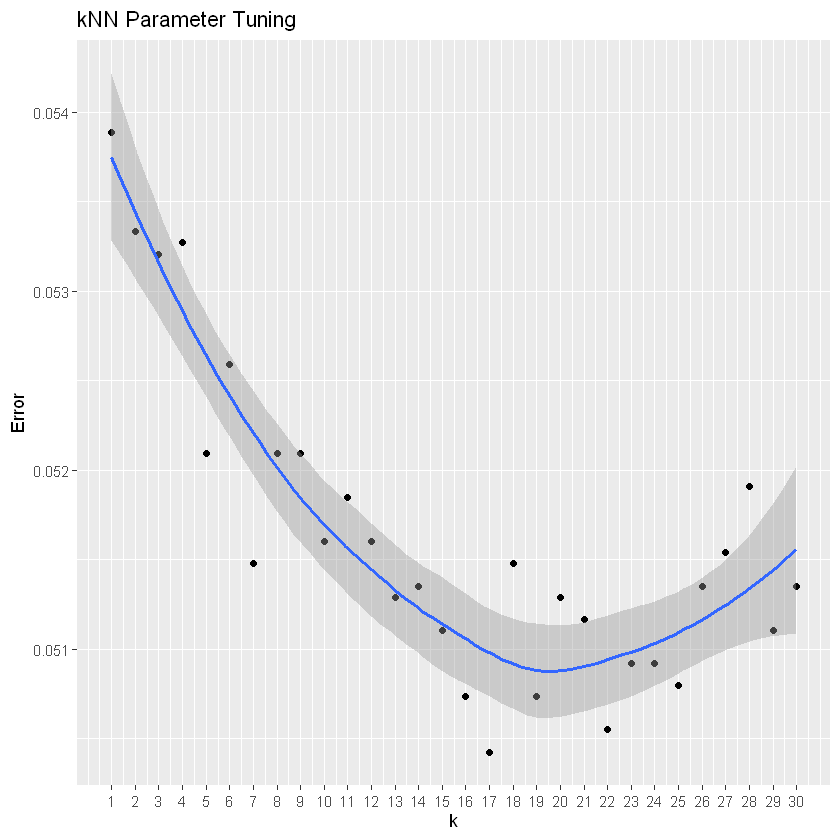

In [ ]:
# INSERT CODE HERE
ggplot(output, aes(x = k, y = error)) +
  geom_point() +                                # Scatter plot
  geom_smooth() +
  scale_x_continuous(breaks = seq(floor(min(output$k)), ceiling(max(output$k)), 1)) + # Integer gridlines on x-axis
  labs(title = "kNN Parameter Tuning",
       x = "k",
       y = "Error")


Interpret your plot. What would you select as the best value of `k`? How much does this improve your test error?
> *Write your response here*
>
> Increasing `k` generally reduced error until it became larger than 20. Based on the plot and the fitted smooth line itself, I would select a value around 19 as the best value of `k`. However, the improvement was very marginal. At best we have an error rate around 5.0% and at worst around 5.4%.


# 4: Standardizing predictors (2)
-----

Because knn is based on distances between points, it is very sensitive to the scale of your variables. Looking at our predictor variables, we can see that `carat` and `depth` are orders of magnitude different in terms of scales. Maybe we can improve our fit even more by addressing this!

Below, use the `scale()` function to standardize your predictors. (Note that you don't need to standardize `price_bin`.)

Then, run your model a final time with your standardized predictors (just `carat` and `depth` still). Set `k` to the optimal value you determined in your plot above. Output the confusion matrix and error rate again.

In [ ]:
set.seed(2023)
#INSERT CODE HERE
train.X_s <- scale(train.X1)
test.X_s <- scale(test.X1)

test.y_pred_s <- knn(train.X_s, test.X_s, train.y, k = 19)

#create confusion matrix
confusion_df = data.frame(test.y_pred_s, test.y)
colnames(confusion_df) = c('Predicted', 'Actual')

table(confusion_df)
print(paste("Error rate:",mean(test.y_pred_s != test.y)))
print(paste("Accuracy:",mean(test.y_pred_s == test.y)))

print(paste("For reference, without scaling, with k=19, the error rate is:",
	output$error[output$k == 19]))

         Actual
Predicted    0    1
        0 9720  292
        1  526 5644

[1] "Error rate: 0.0505499938202942"
[1] "Accuracy: 0.949450006179706"
[1] "For reference, without scaling, with k=19, the error rate is: 0.0507353849956742"


What impact did rescaling the data have on your error rate?
> *Write response here*
>
> Rescaling the data slightly improved the error rate.


**DUE:** 5pm March 20, 2024

**IMPORTANT** Did you collaborate with anyone on this assignment? If so, list their names here.
> *Someone's Name*
>
>
